

```
# Ce texte est au format code
```

Loading libraries and data

In [1]:
import re   # for regular expressions
import nltk # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#data = data.loc[:, ['text', 'airline_sentiment']]


In [2]:
# Try reading the file with a different encoding
file_path = 'D:\Program Files\PFE\SA_pipline\Airline-Sentiment-2-w-AA.csv'

# Try with 'latin1' encoding
try:
    data = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    # Try with 'iso-8859-1' encoding if 'latin1' fails
    data = pd.read_csv(file_path, encoding='iso-8859-1')

print(data.head())

    _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0  681448150    False   finalized                   3      2/25/15 5:24   
1  681448153    False   finalized                   3      2/25/15 1:53   
2  681448156    False   finalized                   3     2/25/15 10:01   
3  681448158    False   finalized                   3      2/25/15 3:05   
4  681448159    False   finalized                   3      2/25/15 5:50   

  airline_sentiment  airline_sentiment:confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason:confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN  

*texte en italique*

```
Data Inspection
```



In [3]:
# Display the first few rows of the dataset
data.head(200)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,681448583,False,finalized,3,2/25/15 0:58,negative,1.0000,Cancelled Flight,1.0000,Virgin America,NaN,FiDiFamilies,NaN,0,@VirginAmerica Because we never rec'd Cancelle...,NaN,2/21/15 15:47,5.692820e+17,New York City,Eastern Time (US & Canada)
196,681448585,False,finalized,3,2/25/15 3:47,negative,1.0000,Flight Booking Problems,1.0000,Virgin America,NaN,lexiesalas,NaN,0,@VirginAmerica trying to book a flight &amp; y...,NaN,2/21/15 15:29,5.692780e+17,BAYAREAÏöüNYC,Pacific Time (US & Canada)
197,681448587,False,finalized,3,2/25/15 0:50,negative,0.7158,Cancelled Flight,0.7158,Virgin America,NaN,Artenis15,NaN,0,@VirginAmerica You have any flights flying int...,NaN,2/21/15 15:27,5.692770e+17,MA // Ashton in Wonderland,Eastern Time (US & Canada)
198,681448589,False,finalized,3,2/25/15 7:38,negative,1.0000,Cancelled Flight,1.0000,Virgin America,NaN,NancyJFriedman,NaN,0,@VirginAmerica you stink. Flight Cancelled Fli...,NaN,2/21/15 14:34,5.692640e+17,New York City,Eastern Time (US & Canada)


In [4]:
data.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692184e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,7.791092e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.675880e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.685590e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.694780e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.698902e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.703110e+17


In [5]:
data = data.loc[:, ['text', 'airline_sentiment']]
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative




```
# Ce texte est au format code
```

*Dans l'ensemble de données sur le train, nous avons 2 242 (~ 7 %) tweets étiquetés comme racistes ou sexistes, et 29 720 (~ 93 %) tweets étiquetés comme non racistes/sexistes. Il s’agit donc d’un défi de classification déséquilibré.
*

1.  Nous allons maintenant vérifier la répartition de la longueur des tweets, en termes de mots, à la fois dans les données de train et de test.





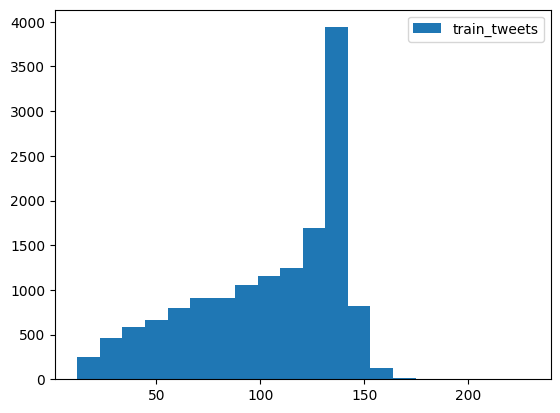

In [6]:
length_train = data['text'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.legend()
plt.show()


In [8]:
data.describe()


,text,airline_sentiment
count,14640,14640
unique,14427,3
top,@united thanks,negative
freq,6,9178


In [7]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt


In [8]:
data['tweet'] = np.vectorize(remove_pattern)(data['text'].astype(str), "@[\w]*")
data=data[['tweet','airline_sentiment','text']]
data.head()

,tweet,airline_sentiment,text
0,What said.,neutral,@VirginAmerica What @dhepburn said.
1,plus you've added commercials to the experien...,positive,@VirginAmerica plus you've added commercials t...
2,I didn't today... Must mean I need to take an...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,"it's really aggressive to blast obnoxious ""en...",negative,@VirginAmerica it's really aggressive to blast...
4,and it's a really big bad thing about it,negative,@VirginAmerica and it's a really big bad thing...


In [9]:
data['tweet'] = data['tweet'].apply(lambda x: re.sub(r"[^a-zA-Z#]", " ", x))
data.head(10)


,tweet,airline_sentiment,text
0,What said,neutral,@VirginAmerica What @dhepburn said.
1,plus you ve added commercials to the experien...,positive,@VirginAmerica plus you've added commercials t...
2,I didn t today Must mean I need to take an...,neutral,@VirginAmerica I didn't today... Must mean I n...
3,it s really aggressive to blast obnoxious en...,negative,@VirginAmerica it's really aggressive to blast...
4,and it s a really big bad thing about it,negative,@VirginAmerica and it's a really big bad thing...
5,seriously would pay a flight for seats th...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,yes nearly every time I fly VX this ear w...,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,Really missed a prime opportunity for Men Wit...,neutral,@VirginAmerica Really missed a prime opportuni...
8,Well I didn t but NOW I DO D,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,it was amazing and arrived an hour early Yo...,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [10]:
data['tweet'] = data['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(10)


,tweet,airline_sentiment,text
0,What said,neutral,@VirginAmerica What @dhepburn said.
1,plus added commercials experience tacky,positive,@VirginAmerica plus you've added commercials t...
2,didn today Must mean need take another trip,neutral,@VirginAmerica I didn't today... Must mean I n...
3,really aggressive blast obnoxious entertainmen...,negative,@VirginAmerica it's really aggressive to blast...
4,really thing about,negative,@VirginAmerica and it's a really big bad thing...
5,seriously would flight seats that didn have th...,negative,@VirginAmerica seriously would pay $30 a fligh...
6,nearly every time this worm away,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,Really missed prime opportunity Without Hats p...,neutral,@VirginAmerica Really missed a prime opportuni...
8,Well didn,positive,"@virginamerica Well, I didn'tÛ_but NOW I DO! :-D"
9,amazing arrived hour early good,positive,"@VirginAmerica it was amazing, and arrived an ..."


In [11]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()


0                                         [What, said]
1        [plus, added, commercials, experience, tacky]
2    [didn, today, Must, mean, need, take, another,...
3    [really, aggressive, blast, obnoxious, enterta...
4                               [really, thing, about]
Name: tweet, dtype: object

In [12]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [13]:
for i in range(len(tokenized_tweet)):
       tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['tweet'] = tokenized_tweet


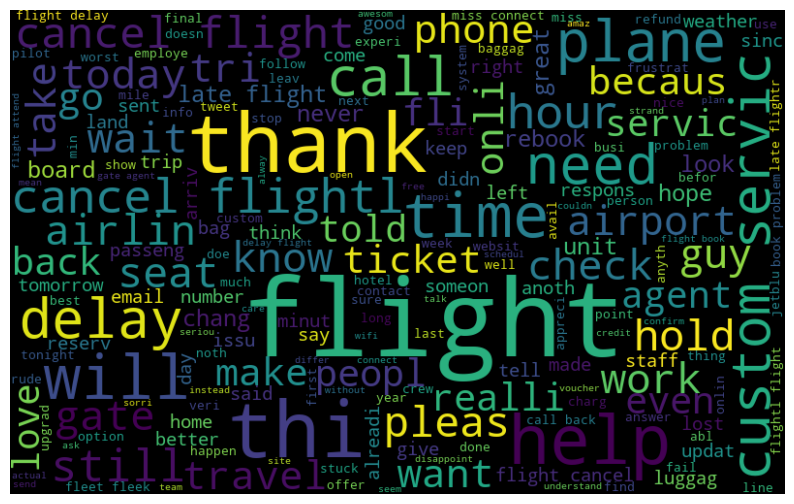

In [14]:
all_words = ' '.join([text for text in data['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [17]:
import re
import pandas as pd

# Fonction pour extraire les hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# Extraction des hashtags pour chaque catégorie d'émotion
HT_neutral = hashtag_extract(data['tweet'][data['airline_sentiment'] == 'neutral'])
HT_positive = hashtag_extract(data['tweet'][data['airline_sentiment'] == 'positive'])
HT_negative = hashtag_extract(data['tweet'][data['airline_sentiment'] == 'negative'])

# Déplier les listes de hashtags
HT_neutral = sum(HT_neutral, [])
HT_positive = sum(HT_positive, [])
HT_negative = sum(HT_negative, [])

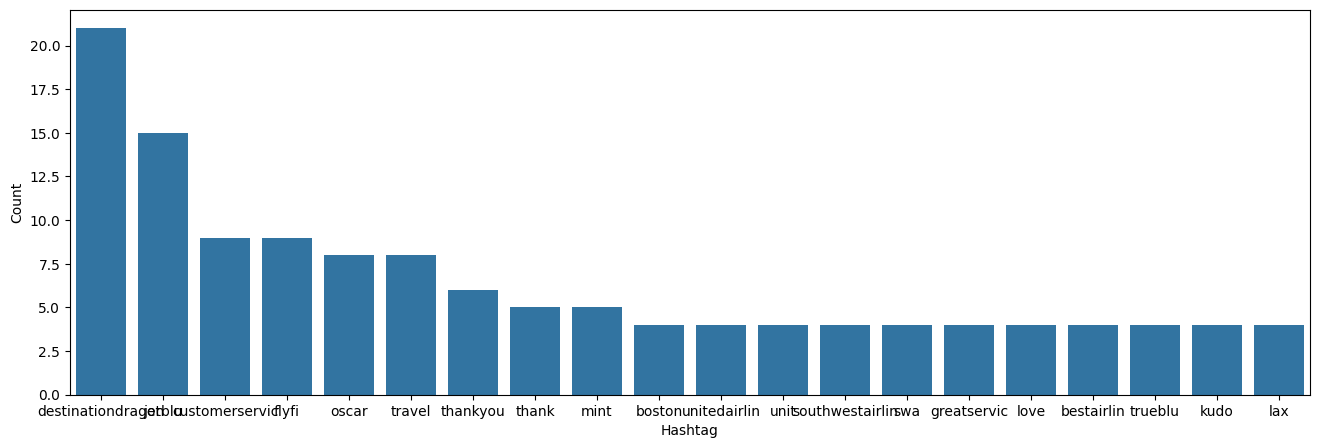

In [18]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


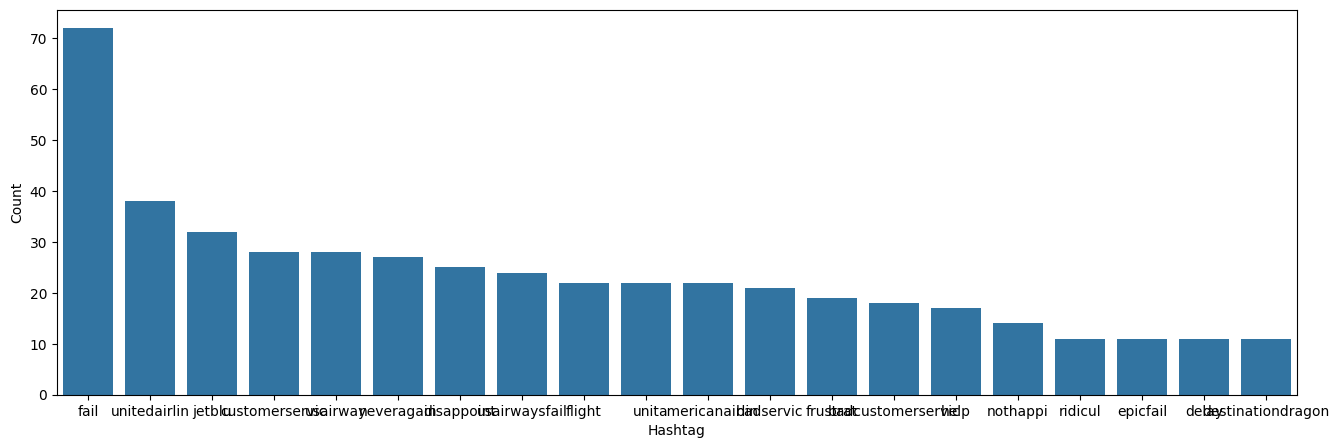

In [19]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim


In [16]:
tokenized_tweet = data['tweet'].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(tokenized_tweet,
                                   vector_size=200,#The error message indicates that the Word2Vec constructor does not have a size argument. According to the documentation, the correct argument is vector_size. # desired no. of features/independent variables
                                   window=5, # context window size
                                   min_count=2,
                                   sg = 1, # 1 for skip-gram model
                                   hs = 0,
                                   negative = 10, # for negative sampling
                                   workers= 2, # no.of cores
                                   seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(data['tweet']), epochs=20)


(2081936, 2634940)

In [28]:
import joblib

# Enregistrer le modèle XGBoost entraîné
joblib.dump(model_w2v, 'model_w2v.joblib')

['model_w2v.joblib']

In [17]:
# Obtenir le vecteur pour un mot spécifique
word_vector = model_w2v.wv['product']

# Trouver les mots les plus similaires à un mot donné
similar_words = model_w2v.wv.most_similar('product', topn=10)

print("Vector for 'product':", word_vector)
print("Words most similar to 'product':", similar_words)

Vector for 'product': [-4.44737002e-02 -2.99817562e-01  2.79021174e-01 -7.58476555e-02
 -1.61173612e-01  6.37505949e-02 -5.23925982e-02  4.87388298e-02
 -4.73232642e-02 -5.46072759e-02 -8.75810459e-02  9.70563814e-02
 -3.38827595e-02 -1.02255240e-01 -1.84001196e-02  1.61854133e-01
  2.27877244e-01  9.05181468e-02 -1.79149851e-01 -1.44300461e-02
 -1.61794834e-02  5.65180890e-02  1.87204089e-02 -8.83128401e-03
 -7.73503408e-02 -9.99263972e-02 -1.08505107e-01 -2.80271113e-01
 -1.28384214e-02 -2.09779050e-02 -5.99446930e-02 -1.45976558e-01
 -1.15682460e-01  1.75009564e-01 -1.98407061e-02  4.39558402e-02
  1.04655370e-01  4.89651784e-02 -1.26946911e-01 -2.10246131e-01
  6.83445409e-02 -1.76734611e-01  7.48254135e-02  1.59472749e-01
 -6.50510117e-02 -3.43658887e-02 -1.19171791e-01 -1.05953731e-01
 -2.19982862e-01 -3.11105773e-02  2.06575602e-01 -3.80603001e-02
 -8.23322535e-02  8.27401280e-02  2.00158611e-04  1.80702284e-01
 -1.07974097e-01  9.93337482e-02 -6.60191178e-02  7.44601488e-02
 -5

In [18]:
model_w2v.wv['food']


array([-0.0613616 , -0.32192874, -0.11054689, -0.33012873, -0.37586993,
        0.23464148, -0.15506847,  0.16091667,  0.29996932, -0.43600574,
        0.12855944,  0.07811113,  0.10968848, -0.34447575, -0.8875111 ,
       -0.1979315 ,  0.22949156,  0.16206567, -0.33455056, -0.050454  ,
        0.26999274,  0.25893593,  0.0116416 , -0.37335035,  0.08290261,
        0.1937712 , -0.19277667, -0.44255027,  0.03674384,  0.20268668,
        0.3174618 , -0.32221258, -0.10862827, -0.06143409,  0.265118  ,
       -0.55317026,  0.14268714, -0.35764834, -0.02453817,  0.3050896 ,
       -0.55123365,  0.34181485,  0.20610616, -0.18927817, -0.04931466,
        0.1278823 , -0.19187078,  0.23514965, -0.56975245, -0.11731017,
        0.31989285,  0.41068152,  0.275895  ,  0.49406746, -0.36434963,
       -0.12893477, -0.65033895,  0.05846084, -0.14631826, -0.32455483,
       -0.36202103,  0.01038569,  0.24594857, -0.21302664, -0.01261212,
       -0.42442074,  0.11662087,  0.06893101, -0.31006813,  0.27

In [19]:
len(model_w2v.wv['food']) #The length of the vector is 200


200

In [20]:
def word_vector(tokens, size):
    vec = np.zeros((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [21]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
  wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
  wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(14640, 200)

In [22]:
# Remplacement des étiquettes par des valeurs numériques
label_mapping = {
    "neutral": 1,
    "positive": 2,
    "negative": 0
}
data['label_numeric'] = data['airline_sentiment'].map(label_mapping)
X = wordvec_df  # Features
y = data['label_numeric']  # Labels

In [23]:
# Diviser les données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Entraîner un modèle de classification (exemple avec Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

# Initialiser et entraîner le modèle Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_predrf = model.predict(X_test)
y_predrf_proba = model.predict_proba(X_test)

# Binarisation des étiquettes pour le calcul de l'AUC-ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_rf = accuracy_score(y_test, y_predrf)

# Calcul du F1 score pour l'ensemble de validation
f1_rf = f1_score(y_test, y_predrf, average='micro')

# Calcul de l'AUC-ROC pour l'ensemble de validation
auc_roc_rf = roc_auc_score(y_test_binarized, y_predrf_proba, average='macro')

# Validation croisée pour obtenir la précision moyenne (CV-Accuracy)
cv_scores_rf = cross_val_score(model, X_train, y_train, cv=5)
cv_accuracy_rf = cv_scores_rf.mean()

# Affichage des métriques
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("AUC-ROC (macro):", auc_roc_rf)
print("CV-Accuracy:", cv_accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_predrf))


Accuracy: 0.7588797814207651
F1 Score: 0.7588797814207651
AUC-ROC (macro): 0.8643252283662989
CV-Accuracy: 0.7478638151398883
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1889
           1       0.66      0.36      0.47       580
           2       0.81      0.46      0.59       459

    accuracy                           0.76      2928
   macro avg       0.74      0.59      0.64      2928
weighted avg       0.75      0.76      0.73      2928



In [20]:
# Entraîner un modèle de classification (exemple avec Random Forest)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_predrf = model.predict(X_test)

# Évaluer la performance du modèle
from sklearn.metrics import accuracy_score, classification_report

accuracy_rf = accuracy_score(y_test, y_predrf)
print("Accuracy:", accuracy_rf)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, y_predrf))


Accuracy: 0.762636612021858
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1889
           1       0.67      0.37      0.48       580
           2       0.82      0.46      0.59       459

    accuracy                           0.76      2928
   macro avg       0.75      0.60      0.64      2928
weighted avg       0.76      0.76      0.74      2928



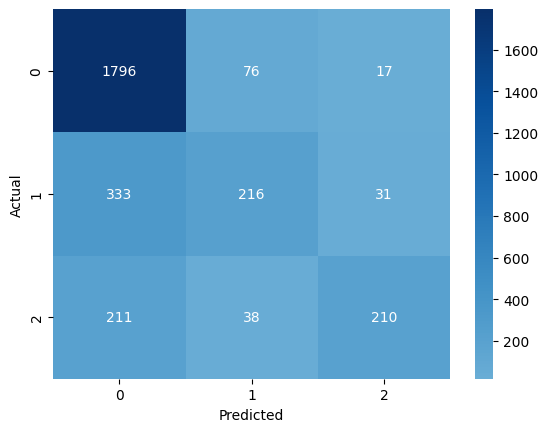

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

y_predrf = model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predrf)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Initialisation du modèle de régression logistique avec OneVsRestClassifier
lreg = OneVsRestClassifier(LogisticRegression())

# Entraînement du modèle sur l'ensemble d'entraînement
lreg.fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
prediction_lreg = lreg.predict_proba(X_test)

# Pour un problème multiclasse, nous prenons la classe avec la probabilité la plus élevée
# avec un seuil de 0.3 pour le cas binaire on ajuste pour multiclasse
threshold = 0.3
prediction_int = (prediction_lreg >= threshold).astype(int)

# On doit ajuster pour prendre la classe ayant la probabilité maximale
# En multiclasse, nous devons considérer la classe avec la probabilité la plus élevée
# Utilisation de l'indice de la probabilité maximale pour chaque exemple
y_pred_lreg = np.argmax(prediction_lreg, axis=1)

# Calcul du F1 score pour l'ensemble de validation
f1_lreg = f1_score(y_test, y_pred_lreg, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_lreg = accuracy_score(y_test, y_pred_lreg)
print("F1 Score:", f1_lreg)
print("Accuracy:", accuracy_lreg)
# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, y_pred_lreg))

d:\Program Files\PFE\SA_pipline\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.7814207650273223
Accuracy: 0.7814207650273224
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1889
           1       0.64      0.45      0.53       580
           2       0.79      0.57      0.66       459

    accuracy                           0.78      2928
   macro avg       0.75      0.65      0.69      2928
weighted avg       0.77      0.78      0.77      2928



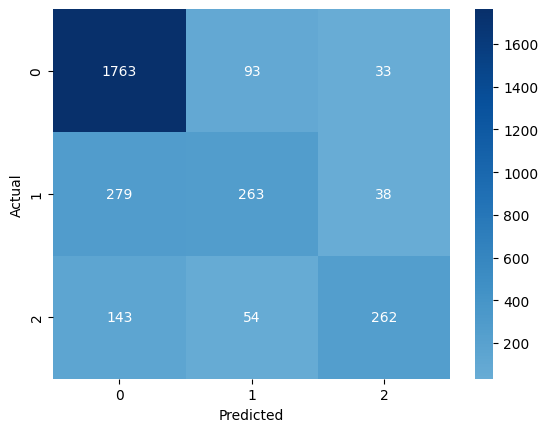

In [33]:
y_pred_lreg = lreg.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_pred_lreg)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from sklearn import svm
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

# Initialiser et entraîner le modèle SVM avec un noyau linéaire
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

# Prédiction des probabilités sur l'ensemble de test
prediction_svm = svc.predict_proba(X_test)

# Trouver la classe avec la probabilité la plus élevée pour chaque échantillon
y_predsvm = np.argmax(prediction_svm, axis=1)

# Calcul du F1 score pour l'ensemble de validation
f1SVM = f1_score(y_test, y_predsvm, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_SVM = accuracy_score(y_test, y_predsvm)

print("F1 Score:", f1SVM)
print("Accuracy:", accuracy_SVM)


F1 Score: 0.7827868852459017
Accuracy: 0.7827868852459017


In [36]:
# Afficher un rapport de classification détaillé
print("Accuracy:", accuracy_SVM)

print("Classification Report:")
print(classification_report(y_test, y_predsvm))

Accuracy: 0.7827868852459017
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1889
           1       0.64      0.46      0.53       580
           2       0.77      0.59      0.67       459

    accuracy                           0.78      2928
   macro avg       0.74      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



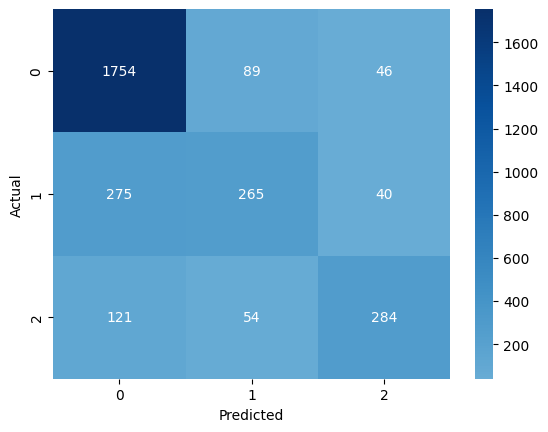

In [37]:
y_predsvm = svc.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predsvm)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

# Entraînement du modèle XGBoost
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_XGB = xgb_model.predict(X_test)
prediction_XGB_proba = xgb_model.predict_proba(X_test)

# Binarisation des étiquettes pour le calcul de l'AUC-ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Calcul du F1 score pour l'ensemble de validation
f1_XGB = f1_score(y_test, prediction_XGB, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_XGB = accuracy_score(y_test, prediction_XGB)

# Calcul de l'AUC-ROC pour l'ensemble de validation
auc_roc_XGB = roc_auc_score(y_test_binarized, prediction_XGB_proba, average='macro')

# Validation croisée pour obtenir la précision moyenne (CV-Accuracy)
cv_scores_XGB = cross_val_score(xgb_model, X_train, y_train, cv=5)
cv_accuracy_XGB = cv_scores_XGB.mean()

# Affichage des métriques
print("F1 Score:", f1_XGB)
print("Accuracy:", accuracy_XGB)
print("AUC-ROC (macro):", auc_roc_XGB)
print("CV-Accuracy:", cv_accuracy_XGB)
print("Classification Report:")
print(classification_report(y_test, prediction_XGB))


F1 Score: 0.7916666666666666
Accuracy: 0.7916666666666666
AUC-ROC (macro): 0.8944738000365097
CV-Accuracy: 0.777747805571623
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1889
           1       0.65      0.49      0.56       580
           2       0.77      0.63      0.70       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score


# Supposons que 'bow' représente les features extraites avec Bag-of-Words
# et 'df['label_numeric']' représente les labels numériques.


# Entraînement du modèle XGBoost
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_XGB = xgb_model.predict(X_test)

# Calcul du F1 score pour l'ensemble de validation
f1_XGB = f1_score(y_test, prediction_XGB, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_XGB = accuracy_score(y_test, prediction_XGB)

print("F1 Score:", f1_XGB)
print("Accuracy:", accuracy_XGB)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, prediction_XGB))

F1 Score: 0.7926912568306012
Accuracy: 0.792691256830601
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1889
           1       0.65      0.50      0.57       580
           2       0.76      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



In [29]:
import joblib

# Enregistrer le modèle XGBoost entraîné
joblib.dump(xgb_model, 'xgb_model.joblib')


['xgb_model.joblib']

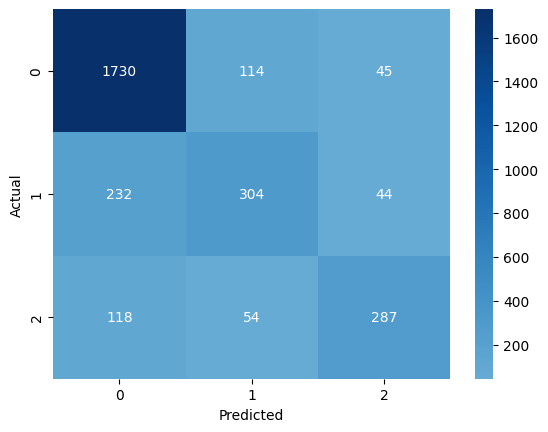

In [39]:
y_predxgb = xgb_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_predxgb)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_knn = knn_model.predict(X_test)
proba_knn = knn_model.predict_proba(X_test)  # Probabilités pour le calcul de l'AUC-ROC

# Calcul du F1 score pour l'ensemble de validation
f1_knn = f1_score(y_test, prediction_knn, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_knn = accuracy_score(y_test, prediction_knn)

# Calcul de l'AUC-ROC pour l'ensemble de validation
# Spécifiez multi_class pour les problèmes de classification multiclasse
auc_roc_knn = roc_auc_score(y_test, proba_knn, multi_class='ovr')

# Calcul de l'accuracy en validation croisée (CV-accuracy)
cv_accuracy_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy').mean()

print("F1 Score:", f1_knn)
print("Accuracy:", accuracy_knn)
print("AUC-ROC:", auc_roc_knn)
print("CV-Accuracy:", cv_accuracy_knn)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, prediction_knn))



F1 Score: 0.7486338797814208
Accuracy: 0.7486338797814208
AUC-ROC: 0.816811374377494
CV-Accuracy: 0.7355693303781491
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.95      0.85      1889
           1       0.63      0.34      0.44       580
           2       0.76      0.44      0.56       459

    accuracy                           0.75      2928
   macro avg       0.72      0.58      0.62      2928
weighted avg       0.74      0.75      0.72      2928



In [40]:
from sklearn.neighbors import KNeighborsClassifier


# Initialiser et entraîner le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de validation
prediction_knn = knn_model.predict(X_test)

# Calcul du F1 score pour l'ensemble de validation
f1_knn = f1_score(y_test, prediction_knn, average='micro')

# Calcul de l'accuracy pour l'ensemble de validation
accuracy_knn = accuracy_score(y_test, prediction_knn)

print("F1 Score:", f1_knn)
print("Accuracy:", accuracy_knn)

# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, prediction_knn))

F1 Score: 0.7503415300546448
Accuracy: 0.7503415300546448
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      1889
           1       0.62      0.33      0.43       580
           2       0.77      0.46      0.57       459

    accuracy                           0.75      2928
   macro avg       0.72      0.58      0.62      2928
weighted avg       0.74      0.75      0.72      2928



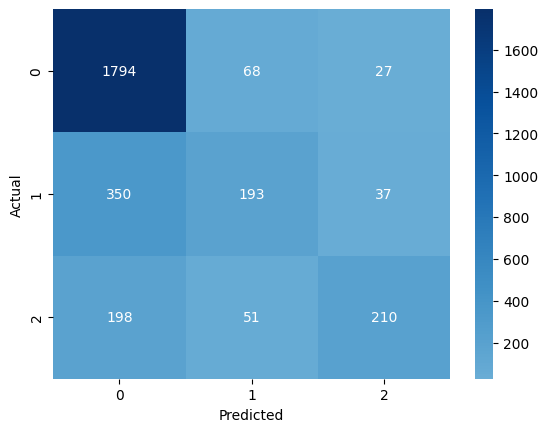

In [41]:
y_pred_knn = knn_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_pred_knn)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Example preprocessing step: scaling features to be non-negative
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser et entraîner le modèle Naive Bayes multinomial
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
prediction_nb = nb_model.predict(X_test_scaled)

# Calculer le F1 score et l'accuracy
f1_nb = f1_score(y_test, prediction_nb, average='micro')
accuracy_nb = accuracy_score(y_test, prediction_nb)

print("F1 Score:", f1_nb)
print("Accuracy:", accuracy_nb)
# Afficher un rapport de classification détaillé
print("Classification Report:")
print(classification_report(y_test, prediction_nb))

F1 Score: 0.6451502732240437
Accuracy: 0.6451502732240437
Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1889
           1       0.00      0.00      0.00       580
           2       0.00      0.00      0.00       459

    accuracy                           0.65      2928
   macro avg       0.22      0.33      0.26      2928
weighted avg       0.42      0.65      0.51      2928



d:\Program Files\PFE\SA_pipline\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files\PFE\SA_pipline\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Program Files\PFE\SA_pipline\.venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


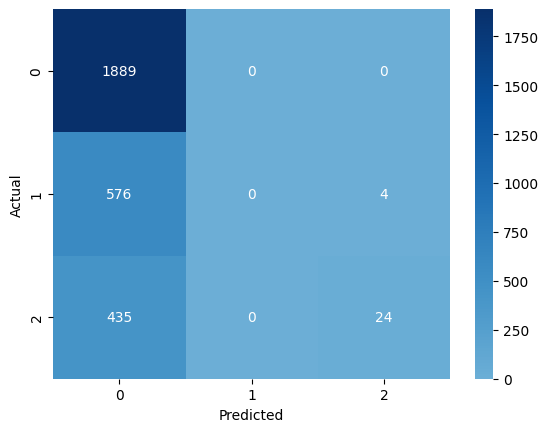

In [44]:
y_pred_nb = nb_model.predict(X_test)
y_true = y_test

# Calcul de la matrice de confusion
CM = confusion_matrix(y_true, y_pred_nb)

# Affichage de la matrice de confusion avec seaborn
sns.heatmap(CM, annot=True, center=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()